# Convolutional Neural Networks for Image Classification

In [19]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
single_image = x_train[0]

In [23]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
single_image.shape

(28, 28)

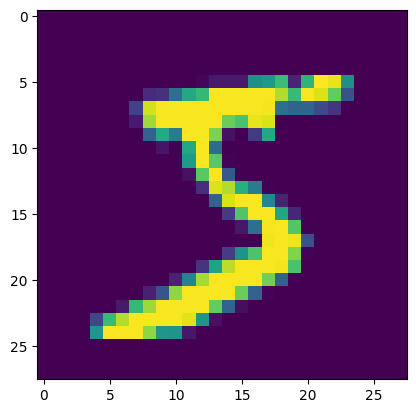

In [25]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [28]:
from keras.utils import to_categorical


In [29]:
y_train.shape

(60000,)

In [30]:
y_example = to_categorical(y_train)

In [31]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
y_example.shape

(60000, 10)

In [33]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [34]:
y_cat_test = to_categorical(y_test,10)

In [35]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [36]:
single_image.max()

np.uint8(255)

In [37]:
single_image.min()

np.uint8(0)

In [38]:
x_train = x_train/255
x_test = x_test/255

In [39]:
scaled_single = x_train[0]

In [40]:
scaled_single.max()

np.float64(1.0)

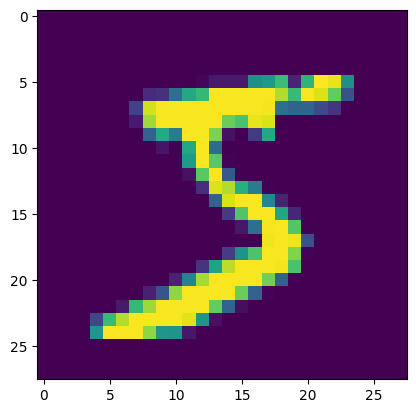

In [41]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [44]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [45]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
x_test = x_test.reshape(10000,28,28,1)

In [47]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/home/rafachem9/Documents/venv-next/python-for-computer-vision-with-opencv-and-deep-learning/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 16:02:20.800947: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [51]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9109 - loss: 0.2981 
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9856 - loss: 0.0480


## Evaluate the Model

In [52]:
model.metrics_names

['loss', 'compile_metrics']

In [53]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0530  


[0.043027445673942566, 0.9847999811172485]

In [54]:
from sklearn.metrics import classification_report

In [55]:
predictions = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predictions[0]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))

Looks like the CNN performed quite well!